In [1]:
import sys
sys.path

['D:\\bio\\jupyter_code\\MOSTA',
 'D:\\anaconda\\envs\\paste\\python310.zip',
 'D:\\anaconda\\envs\\paste\\DLLs',
 'D:\\anaconda\\envs\\paste\\lib',
 'D:\\anaconda\\envs\\paste',
 '',
 'C:\\Users\\23147\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\paste\\lib\\site-packages\\Pythonwin']

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import paste as pst
import ot

In [3]:
sample_names = ['E9.5_E1S1', 'E10.5_E1S1', 'E10.5_E2S1', 'E11.5_E1S1', 'E12.5_E1S1']
input_dir = 'G:/dataset/08-MOSTA/input/'
output_dir = 'G:/dataset/08-MOSTA/output/paste/'
experiment_name = 'MOSTA'

# Load Slices

In [ ]:
# slice_name = "allEmbryo"
# slice_i = sc.read_csv(input_dir + slice_name + "matrix.csv")
# print(slice_i)

In [4]:
adata_list = []
# meta = list()
for dataset in sample_names:
    print(dataset)
    adata = sc.read_h5ad(input_dir + dataset+'.MOSTA.h5ad')
    
    sc.pp.filter_genes(adata, min_counts = 15)
    sc.pp.filter_cells(adata, min_counts = 100)
    
    adata_list.append(adata)

E9.5_E1S1
E10.5_E1S1
E10.5_E2S1
E11.5_E1S1
E12.5_E1S1


In [5]:
for adata in adata_list:
    print(adata)

AnnData object with n_obs × n_vars = 5910 × 18499
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - 2310011J03Rik', 'Regulon - 5730507C01Rik', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Ar', 'Regulon - Arid3a', 'Regulon - Arid3c', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Ascl1', 'Regulon - Atf1', 'Regulon - Atf4', 'Regulon - Atf5', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach1', 'Regulon - Bach2', 'Regulon - Barhl1', 'Regulon - Barx1', 'Regulon - Batf', 'Regulon - Bcl11a', 'Regulon - Bcl3', 'Regulon - Bcl6', 'Regulon - Bcl6b', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlha15', 'Regulon - Bhlhe22', 'Regulon - Bhlhe23', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Boll', 'Regulon - Bptf', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpz', 'Regulon - Chd1', 'Regulon - Clock', 'Re

In [ ]:
import seaborn as sns
n_colors = 10
slice_colors = sns.color_palette(n_colors = n_colors).as_hex()

fig, axs = plt.subplots(2, 2,figsize=(7,7))
i = 0
for adata in adata_list:
    pst.plot_slice(adata,slice_colors[i],ax=axs[int(i/2), int(i%2)])
    i = i + 1
    
plt.show()

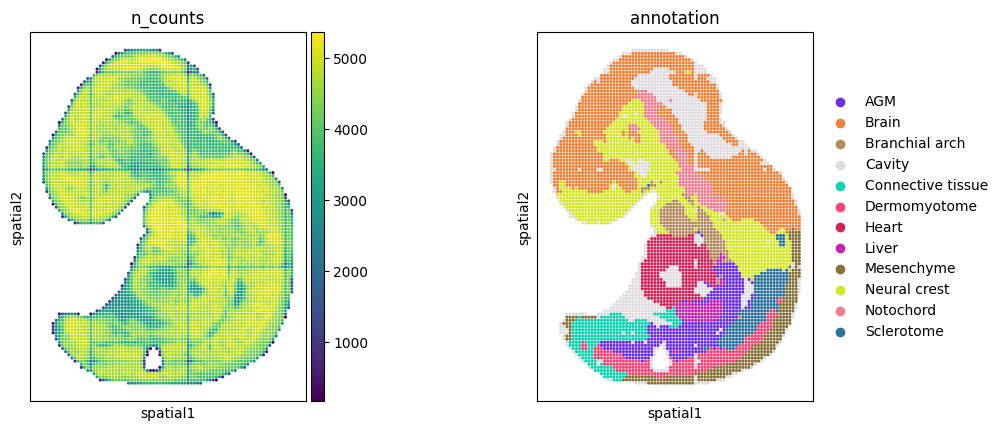

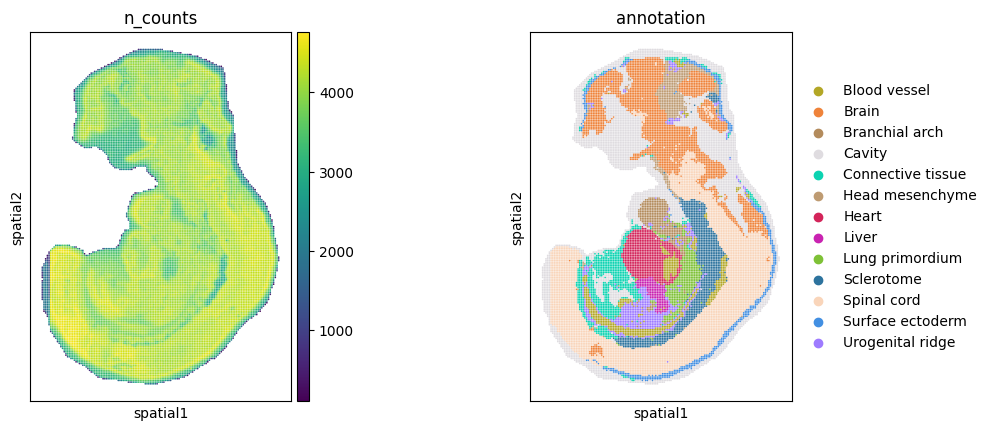

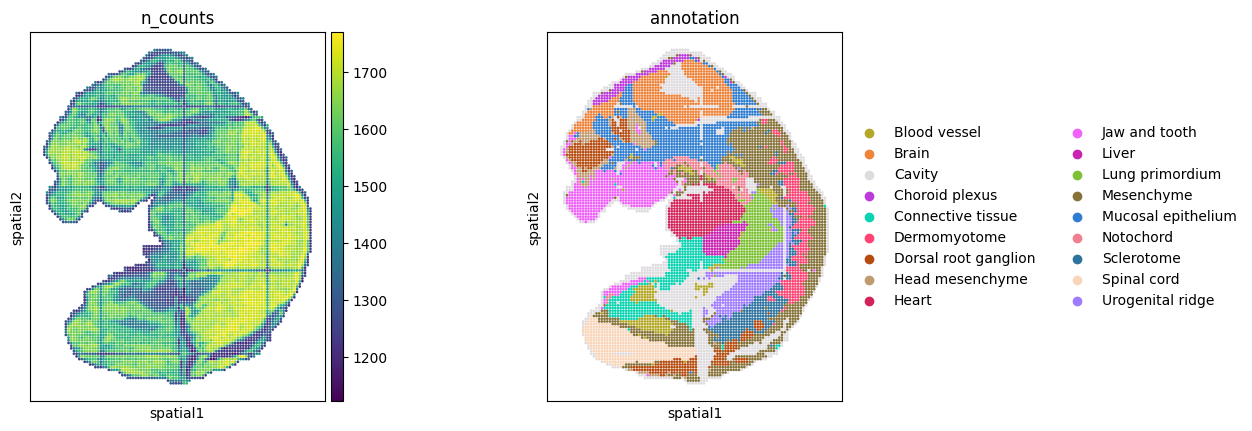

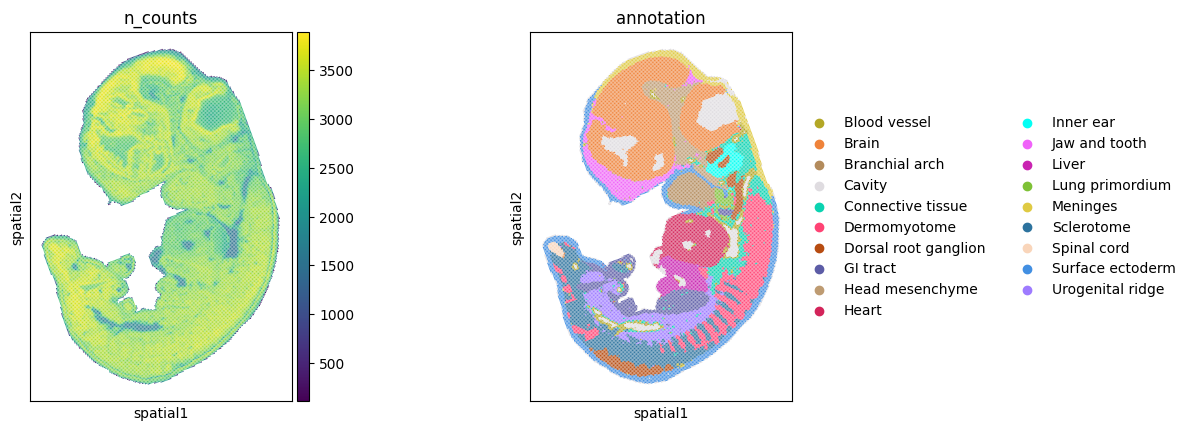

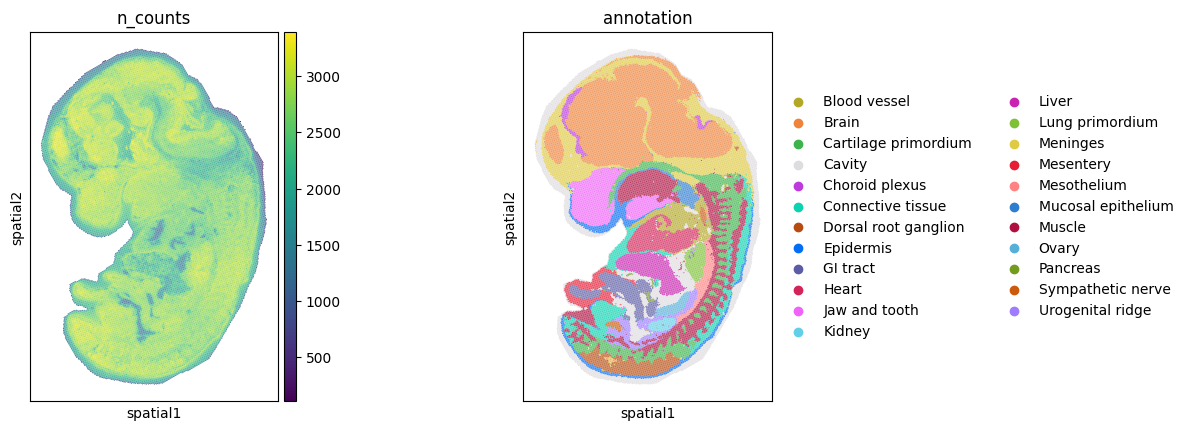

In [6]:
for adata in adata_list:
    sc.pl.spatial(adata, color = ["n_counts", "annotation"], spot_size = 1)

In [ ]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# # seaborn.color_palette(palette = None, n_colors = None, desat = None)

# current_palette = sns.color_palette(n_colors = 6)
# sns.palplot(current_palette)
# plt.show()
# print(sns.color_palette(n_colors = 6).as_hex())

# run PASTE

In [ ]:
import time
start = time.time()

pis = []
for i in range(len(adata_list)-1):
    # pi_temp = pst.pairwise_align(adata_list[i], adata_list[i+1], backend = ot.backend.TorchBackend(), use_gpu = True)
    pi_temp = pst.pairwise_align(adata_list[i], adata_list[i+1])
    pis.append(pi_temp)
    
print('Runtime: ' + str(time.time() - start))

In [ ]:
print(pis)

In [ ]:
# To visualize the alignment you can stack the slices 
# according to the alignment pi
new_slices = pst.stack_slices_pairwise(adata_list, pis)

plt.figure(figsize=(7,7))
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)
plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

In [ ]:
# slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

fig, axs = plt.subplots(1, 2,figsize=(7,7))
for i in range(len(adata_list)-1):
    pst.plot_slice(new_slices[i], slice_colors[i], ax=axs[int(i%2)])
    pst.plot_slice(new_slices[i+1], slice_colors[i+1], ax=axs[int(i%2)])
    
# fig.delaxes(axs[1,1])
plt.show()

In [ ]:
type(adata_list[0].obsm['spatial'])

In [ ]:
# save coor
new_coord = new_slices[0].obsm['spatial']
cells = new_slices[0].obs_names
for i in range(1, len(adata_list)):
    new_coord = np.vstack((new_coord, new_slices[i].obsm['spatial']))
    cells = np.hstack((cells, new_slices[i].obs_names))

# new_coord=np.vstack((new_slices[0].obsm['spatial'],
#                     new_slices[1].obsm['spatial']))
# cells=np.hstack((new_slices[0].obs_names,new_slices[1].obs_names))

new_coord=pd.DataFrame(new_coord,index=cells,columns=['x','y'])
new_coord.to_csv(output_dir + "paste_coord_" + experiment_name + ".csv")

## center slice mode

In [ ]:
slices = adata_list

initial_slice = slices[0].copy()
lmbda = len(slices)*[1/len(slices)]

pst.filter_for_common_genes(slices)

b = []
for i in range(len(slices)):
    b.append(pst.match_spots_using_spatial_heuristic(slices[0].X.todense(), slices[i].X.todense()))

In [ ]:
type(slices[0].X.dtype)

In [ ]:
start = time.time()
## Possible to pass in an initial pi (as keyword argument pis_init) 
## to improve performance, see Tutorial.ipynb notebook for more details.
# center_slice, pis = pst.center_align(initial_slice, slices, lmbda) 

# center_slice, pis = pst.center_align(initial_slice, slices, lmbda, random_seed = 5, backend = ot.backend.TorchBackend(), use_gpu = True)
center_slice, pis = pst.center_align(initial_slice, slices, lmbda, pis_init = b, backend = ot.backend.TorchBackend(), use_gpu = True) 

print('Runtime: ' + str(time.time() - start))

In [ ]:
W = center_slice.uns['paste_W']
H = center_slice.uns['paste_H']

In [ ]:
print(type(W))
print(type(H))
print(W)
print(H)

In [ ]:
print(W.shape)
print(H.shape)

In [ ]:
np.savetxt(output_dir + experiment_name +"_W.csv", W, delimiter=",")
np.savetxt(output_dir + experiment_name +"_H.csv", H, delimiter=",")

In [ ]:
center, new_slices = pst.stack_slices_center(center_slice, slices, pis)

In [ ]:
center_color = 'orange'
# slices_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
slice_colors = sns.color_palette(n_colors = n_colors).as_hex()

plt.figure(figsize=(7,7))
pst.plot_slice(center,center_color,s=400)
for i in range(len(new_slices)):
    pst.plot_slice(new_slices[i],slice_colors[i],s=400)

plt.legend(handles=[mpatches.Patch(color=slice_colors[0], label='1'),mpatches.Patch(color=slice_colors[1], label='2')])
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

In [ ]:
# center_color = 'orange'
# # slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']

# fig, axs = plt.subplots(1, 1,figsize=(7,7))
# for i in range(len(new_slices)):
#     pst.plot_slice(center,center_color,ax=axs[int(i/2),int(i%2)])
#     pst.plot_slice(new_slices[i],slice_colors[i],ax=axs[int(i/2),int(i%2)])
# plt.show()